# 1. Importing python dependencies for Global Sensitivity Analysis

This exercise assumes that you already installed SALib and the ema_workbench

In [4]:
from ema_workbench import (Model, RealParameter, ScalarOutcome, ema_logging,
                           perform_experiments)
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import math
import seaborn
import matplotlib.pyplot as plt

# 2. The Ishigami function

The Ishigami function is a popular test case to perform sensitivity analysis for non-linear, non-additive functions.

$Y(x_1,x_2,x_3)=sin(x_1)+A\cdot sin^2(x_2)+B\cdot x_3^4\cdot sin(x_1)$

In [5]:
def Ishigami(A,B,x1,x2,x3,n):
    
    # A and B: are constants
    
    # n: number of samples
    
    Y = np.zeros(n)
    
    for i in range(n):
        Y[i] = math.sin(x1[i]) + A * math.pow(math.sin(x2[i]), 2) + \
        B * math.pow(x3[i], 4) * math.sin(x1[i])
    
    return Y

# 3. Running One-at-A-Time Sensitivity Analysis

Perform a One-At-a-Time sensitivity analysis for each of the parameters $x_i; \forall x_i \in [-\pi,\pi]$ of the Ishigami test function.  Assume values for A=7, B=0.1, number of samples =1000. Tip, you can use the np.random.uniform

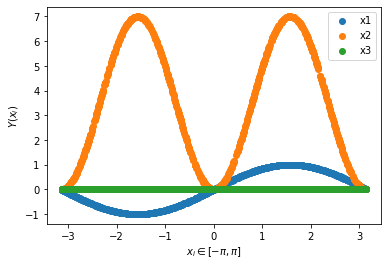

In [7]:
A = 7
B = 0.1
n = 1000
min=-math.pi; max= math.pi

vary= np.random.uniform(min,max, size=n); fixed=np.zeros(n)

plt.scatter(vary,Ishigami(A,B,vary,fixed,fixed,n), label='x1')
plt.scatter(vary,Ishigami(A,B,fixed,vary,fixed,n), label='x2')
plt.scatter(vary,Ishigami(A,B,fixed,fixed,vary,n), label='x3')
plt.xlabel(r'$x_i\in [-\pi,\pi]$')
plt.ylabel(r'$Y(x_i)$')
plt.legend()

Assuming different fixed value.

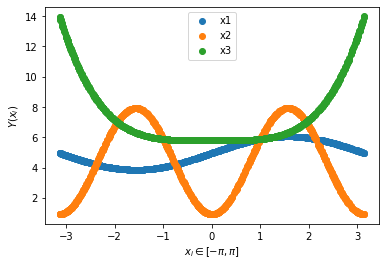

In [8]:
fixed=np.ones(n)


plt.scatter(vary,Ishigami(A,B,vary,fixed,fixed,n),label='x1')
plt.scatter(vary,Ishigami(A,B,fixed,vary,fixed,n),label='x2')
plt.scatter(vary,Ishigami(A,B,fixed,fixed,vary,n),label='x3')
plt.xlabel(r'$x_i\in [-\pi,\pi]$')
plt.ylabel(r'$Y(x_i)$')
plt.legend()

# 4. Global Sensitivity Analysis

## Linear Regression

In order to perform a linear regression, we fist 

0.11849670626362632
[ 2.32250697e+00  1.07098866e+01  3.74419864e+00  5.52303319e+00
  3.07910000e+00 -5.26167633e-01  8.09015458e-01  3.63855684e+00
  8.17946027e-01  5.78258643e+00  1.18525450e+00 -1.13333151e-01
  8.00453644e+00 -2.25094945e+00  2.95755871e+00  2.10828857e+00
  7.21488575e+00  2.69722054e-01  6.87719682e+00  1.50123135e+00
  1.32112028e+00  4.54691768e+00  6.62838834e+00  6.32178409e+00
  6.62464377e+00  5.21850361e+00  4.18672600e+00 -6.62361876e-01
 -9.21477534e+00 -1.32492341e-01  1.50290583e+00  6.39824463e+00
  3.99465890e+00  4.13595335e+00  6.17248560e+00  1.02043459e+00
 -8.80961501e-02  9.93473194e+00  6.24959883e+00  7.61544205e+00
 -2.74124938e+00  5.22419615e+00  6.28392310e+00  5.30197427e+00
  9.87969572e-01  7.16768267e+00 -3.31558720e+00  5.04419302e+00
 -3.48781224e+00  5.69256695e+00  3.43073359e+00  2.65239872e+00
  5.99914518e+00 -1.13814881e+00 -4.96105168e+00 -8.53271874e-01
  1.27883482e+00  3.67906838e+00  4.34787838e+00  4.12927566e+00
  3.5

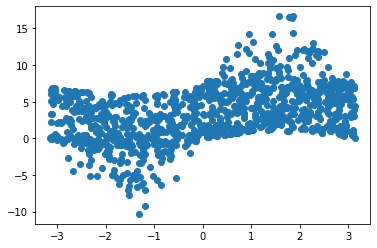

In [92]:
x1 = np.random.uniform(min, max, n)
x2 = np.random.uniform(min, max, n)
x3 = np.random.uniform(min, max, n)

Y=Ishigami(A,B,x1,x2,x3,n)


SE=(np.std(Y))/(n**0.5)


plt.scatter(x1,Y)


In [84]:
# Define the model inputs
n_saltelli=1024
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[min,max],
               [min,max],
               [min,max]]
}

# Generate samples
X = saltelli.sample(problem, n_saltelli)

# # Run model (example)
Y = Ishigami(A,B,X[:,0],X[:,1],X[:,2],n_saltelli)

# # Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

          ST   ST_conf
x1  0.527788  0.220401
x2  0.439700  0.121302
x3  0.218011  0.062281
          S1   S1_conf
x1  0.306583  0.172120
x2  0.447221  0.161644
x3  0.028040  0.187906
                S2   S2_conf
(x1, x2)  0.007230  0.225724
(x1, x3)  0.220996  0.284381
(x2, x3) -0.013956  0.177559


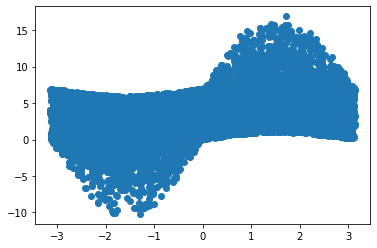

In [20]:
plt.scatter(X[:,0],Y)
plt.show()

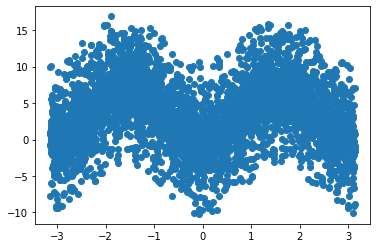

In [21]:
plt.scatter(X[:,1],Y)
plt.show()

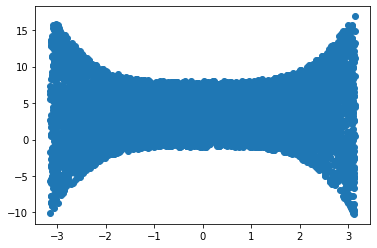

In [22]:
plt.scatter(X[:,2],Y)
plt.show()

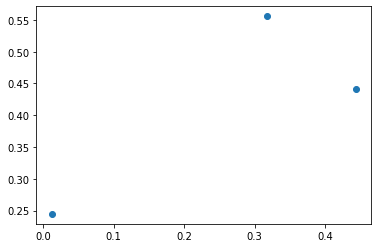

In [9]:
plt.scatter(Si['S1'], Si['ST'])
plt.show()

In [9]:
from SALib.test_functions import Sobol_G

In [ ]:
n_saltelli=1024
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[min,max],
               [min,max],
               [min,max]]
}

# Generate samples
X = saltelli.sample(problem, n_saltelli)

# # Run model (example)
Y = Sobol_G(A,B,X[:,0],X[:,1],X[:,2],n_saltelli)

# # Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)